AtBat        0
Hits         0
HmRun        0
Runs         0
RBI          0
Walks        0
Years        0
CAtBat       0
CHits        0
CHmRun       0
CRuns        0
CRBI         0
CWalks       0
League       0
Division     0
PutOuts      0
Assists      0
Errors       0
Salary       0
NewLeague    0
dtype: int64
   AtBat  Hits  HmRun  Runs  RBI  Walks  Years  CAtBat  CHits  CHmRun  CRuns  \
1    315    81      7    24   38     39     14    3449    835      69    321   
2    479   130     18    66   72     76      3    1624    457      63    224   
3    496   141     20    65   78     37     11    5628   1575     225    828   
4    321    87     10    39   42     30      2     396    101      12     48   
5    594   169      4    74   51     35     11    4408   1133      19    501   

   CRBI  CWalks League Division  PutOuts  Assists  Errors  Salary NewLeague  
1   414     375      N        W      632       43      10   475.0         N  
2   266     263      A        W      880       82 

'classifier_tree.png'

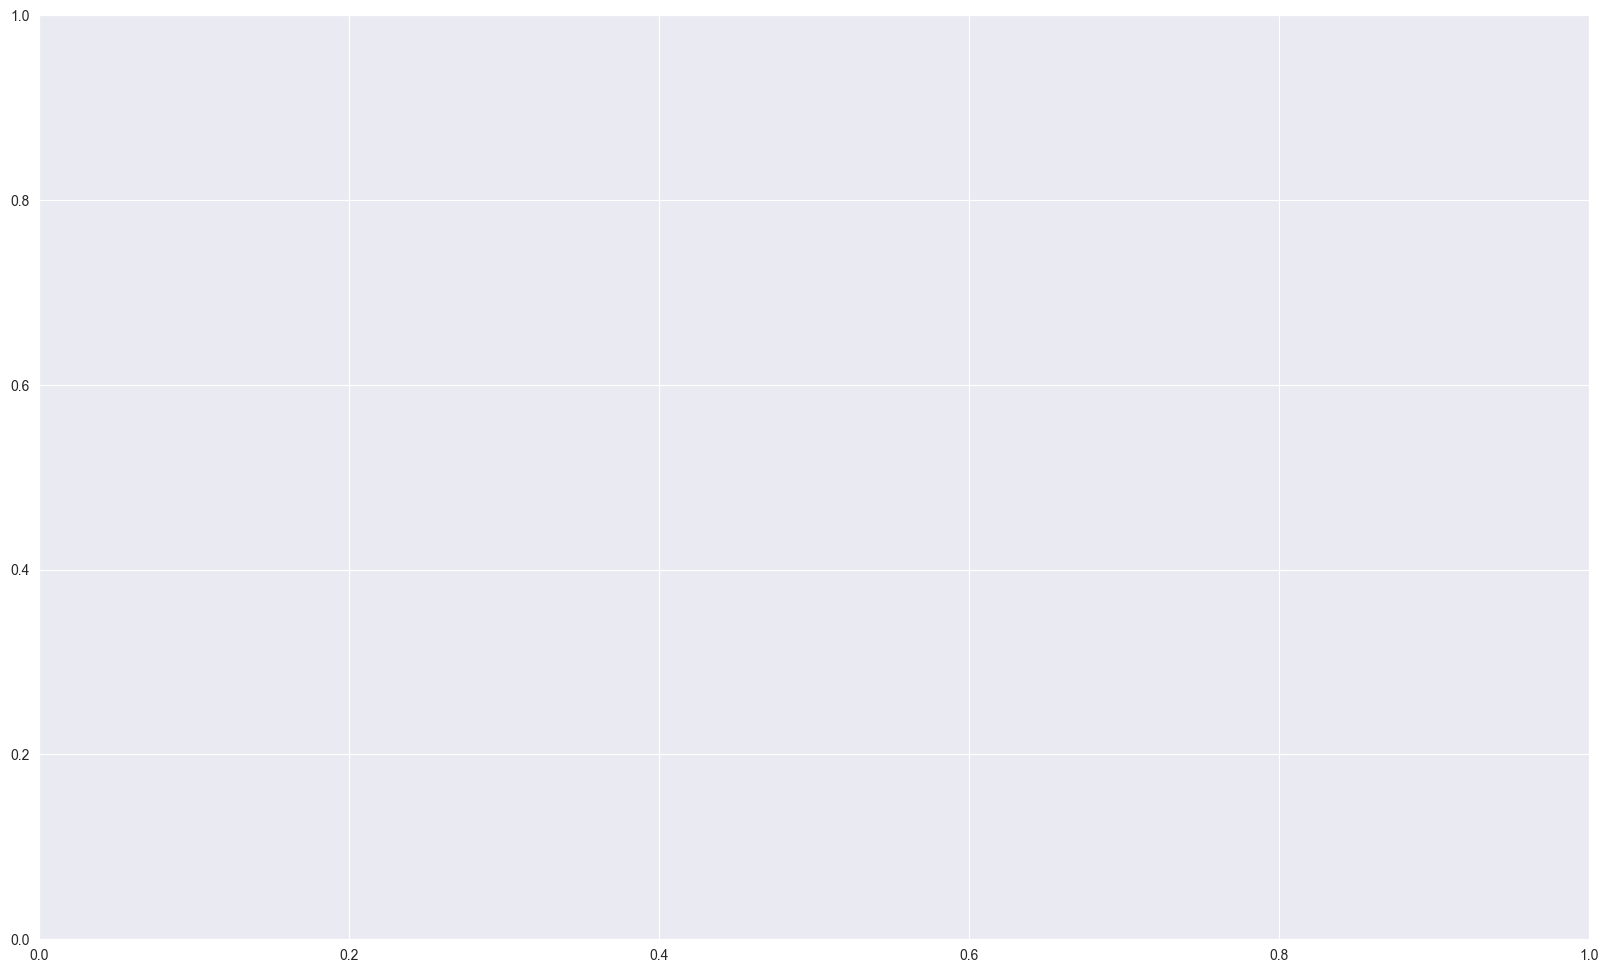

In [22]:
import pandas as pd
import numpy as np
import os
from sklearn.tree import DecisionTreeRegressor,export_graphviz, plot_tree #visualizing the tree and build regression model
import matplotlib.pyplot as plt
data = pd.read_csv('Hitters.csv').dropna()
print(data.isnull().sum())
print(data.head())
import graphviz
from graphviz import Source

#customizing Node Color function
def node_color_function(value):
    if value > 130:
        return "lightblue"
    elif value < 80:
        return "lightgreen"
    else:
        return "pink"
#preprocessing long transform the data
data['Log_Salary'] = np.log(data['Salary'])
#defining features years and hits
x= data[['Years','Hits']] #features
y= data['Salary']
#create and fit the regression model
reg_tree = DecisionTreeRegressor()
reg_tree.fit(x, y)

#get the values Predictions of the tree node
values = reg_tree.apply(x)

#set_node colors
node_colors = [node_color_function(value) for value in values ]

#visualizing the tree
fig, ax= plt.subplots(figsize=(20,12))
#plot_tree(reg_tree, feature_names=["Years", "Hits"], filled=True, rounded=True, ax=ax)
#manually adjusting the colors
for i, patch in enumerate(ax.patches):
    patch.set_facecolor(node_colors[i])

#set edge colors
for i, patch in enumerate(ax.patches):
    patch.set_edgecolor("white")
#plt.show()
with open("classifier.dot", 'w') as f:
    export_graphviz(reg_tree, out_file=f,
                          feature_names=["Years", "Hits"])
with open('classifier.dot') as f:
    dt_graph = f.read()
os.environ["PATH"] += os.pathsep + "C:\\Users\\juliu\\Graphviz-12.2.1-win64\\bin"
#using graphviz source to display
# Display the tree
#open the graph immediately using view=True
graphviz.Source(dt_graph).render("classifier_tree", format="png", view=True)

#graph = Source(dot_dat)
#graph.render("Decision_tree", format="png", cleanup=True) #save as pg
#diplay the graph
#img = plt.imread('Decision_tree.png')
#plt.figure(figsize=(20,12))
#plt.imshow(img)
#plt.axis("off")
#plt.show()
